# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")

## **LOADING DATASET AND DATA UNDERSTANDING**

In [2]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#load dataset
train_data= pd.read_csv("/content/drive/My Drive/Datasets/Train.csv")
test_data = pd.read_csv("/content/drive/My Drive/Datasets/Test.csv")

In [4]:
# Display the first few rows of the dataset to verify successful loading
print("First few rows of the train dataset:")
train_data.head()


First few rows of the train dataset:


,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [5]:
print("First few rows of the test dataset:")
test_data.head()

First few rows of the test dataset:


,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success


In [6]:
# Display basic information about the datasets
print("Train Dataset Information:")
train_data.info()
print("\nTest Dataset Information:")
test_data.info()

Train Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 

## **Handling Missing Values and Outliers**

In [7]:
missing_train = train_data.isnull().mean() * 100
missing_test = test_data.isnull().mean() * 100

In [8]:
# Display columns with missing values
missing_train = missing_train[missing_train > 0]
missing_test = missing_test[missing_test > 0]

In [9]:
print("Missing Values in Train Dataset (Percentage):")
print(missing_train.sort_values(ascending=False))

Missing Values in Train Dataset (Percentage):
days_since_prev_campaign_contact    81.622271
customer_age                         1.955952
balance                              1.260783
last_contact_duration                0.982716
marital                              0.473979
personal_loan                        0.470819
num_contacts_in_campaign             0.353904
dtype: float64


In [10]:
print("\nMissing Values in Test Dataset (Percentage):")
print(missing_test.sort_values(ascending=False))


Missing Values in Test Dataset (Percentage):
days_since_prev_campaign_contact    82.003834
customer_age                         1.990563
balance                              1.334415
last_contact_duration                0.899440
marital                              0.597169
personal_loan                        0.545562
num_contacts_in_campaign             0.331761
dtype: float64


In [11]:
# Columns to drop based on missing values threshold
threshold = 80  # 80% threshold
columns_to_drop_train = missing_train[missing_train > threshold].index
columns_to_drop_test = missing_test[missing_test > threshold].index

In [12]:
# Dropping columns
train_data.drop(columns=columns_to_drop_train, inplace=True)
test_data.drop(columns=columns_to_drop_test, inplace=True)

In [13]:
print(f"\nDropped columns from Train Dataset: {columns_to_drop_train}")
print(f"\nDropped columns from Test Dataset: {columns_to_drop_test}")


Dropped columns from Train Dataset: Index(['days_since_prev_campaign_contact'], dtype='object')

Dropped columns from Test Dataset: Index(['days_since_prev_campaign_contact'], dtype='object')


# Handling Missing Values

In [14]:
# Filling missing values
for column in train_data.columns:
    if train_data[column].dtype in ['int64', 'float64']:
        median = train_data[column].median()
        train_data[column].fillna(median, inplace=True)
    else:
        mode = train_data[column].mode()[0]
        train_data[column].fillna(mode, inplace=True)

In [15]:
# Apply the same method to test dataset
for column in test_data.columns:
    if test_data[column].dtype in ['int64', 'float64']:
        median = test_data[column].median()
        test_data[column].fillna(median, inplace=True)
    else:
        mode = test_data[column].mode()[0]
        test_data[column].fillna(mode, inplace=True)

# Handling Outliers

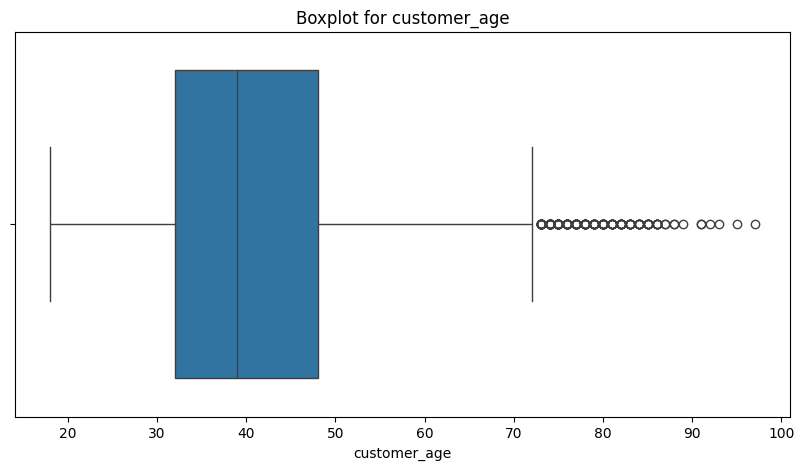

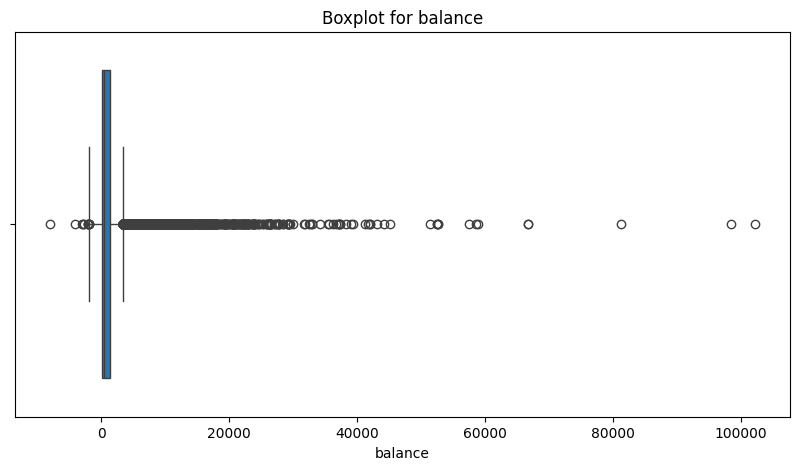

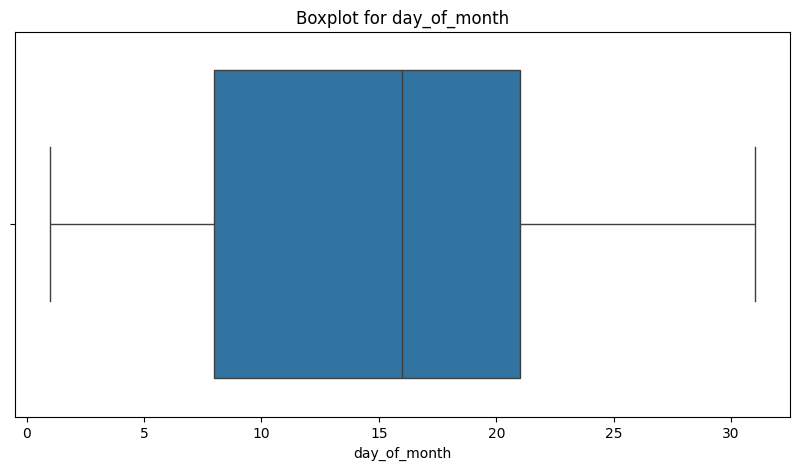

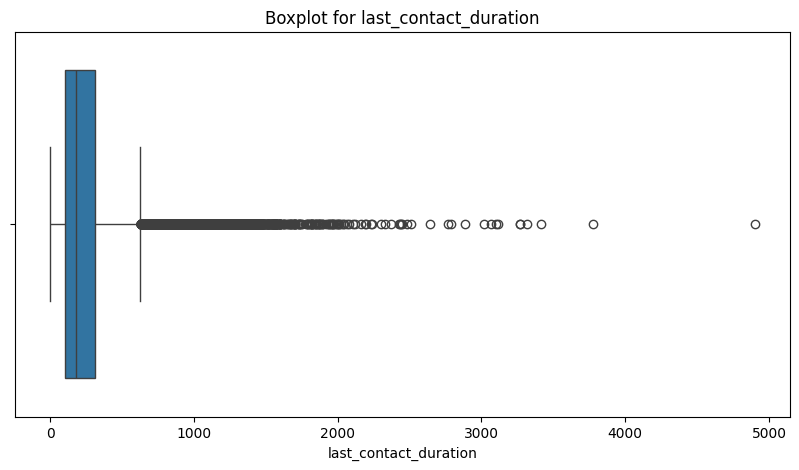

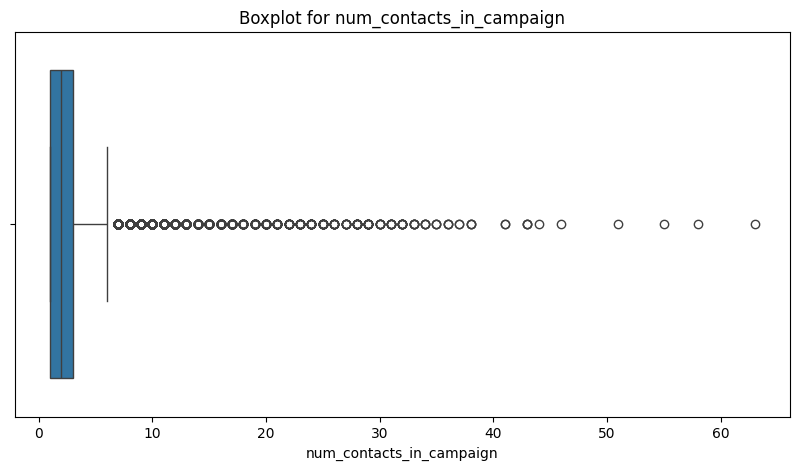

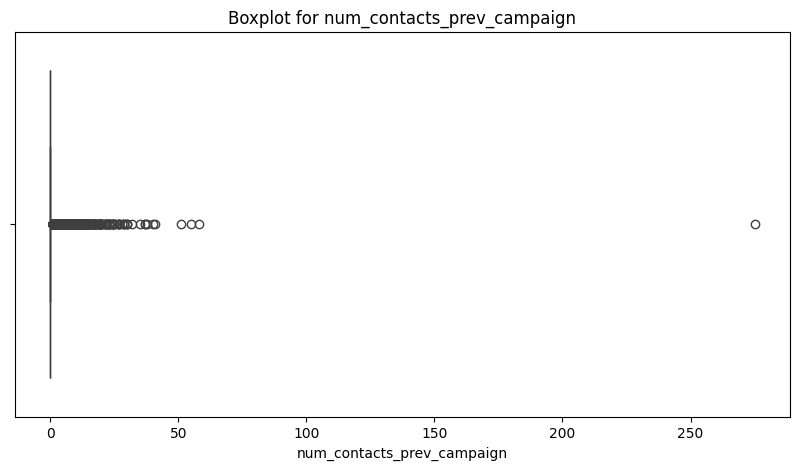

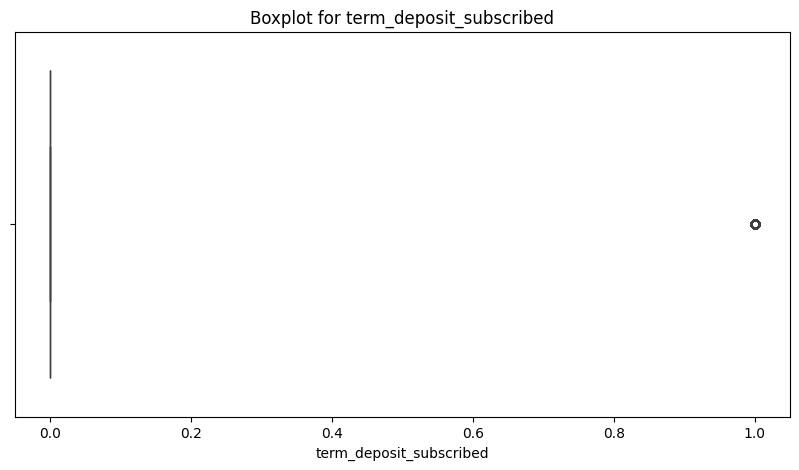

Original Train Dataset Shape: (31647, 17)
Train Dataset Shape after Removing Outliers: (18719, 17)


In [16]:
# Visualize outliers using boxplots
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=train_data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

# Calculate IQR and remove outliers
Q1 = train_data[numerical_columns].quantile(0.25)
Q3 = train_data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers
train_df_no_outliers = train_data[~((train_data[numerical_columns] < (Q1 - 1.5 * IQR)) |(train_data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original Train Dataset Shape: {train_data.shape}")
print(f"Train Dataset Shape after Removing Outliers: {train_df_no_outliers.shape}")




## **Exploratory Data Analysis (EDA)**


Basic Statistics for Train Dataset:
       customer_age       balance  day_of_month  last_contact_duration  \
count  18719.000000  18719.000000  18719.000000           18719.000000   
mean      39.931994    583.155350     15.841605             195.064747   
std        9.801673    805.976684      8.310467             130.396041   
min       18.000000  -1855.000000      1.000000               0.000000   
25%       32.000000     26.000000      8.000000              99.000000   
50%       39.000000    316.000000     16.000000             165.000000   
75%       47.000000    874.000000     22.000000             262.000000   
max       72.000000   3372.000000     31.000000             628.000000   

       num_contacts_in_campaign  num_contacts_prev_campaign  \
count              18719.000000                     18719.0   
mean                   2.202148                         0.0   
std                    1.343644                         0.0   
min                    1.000000             

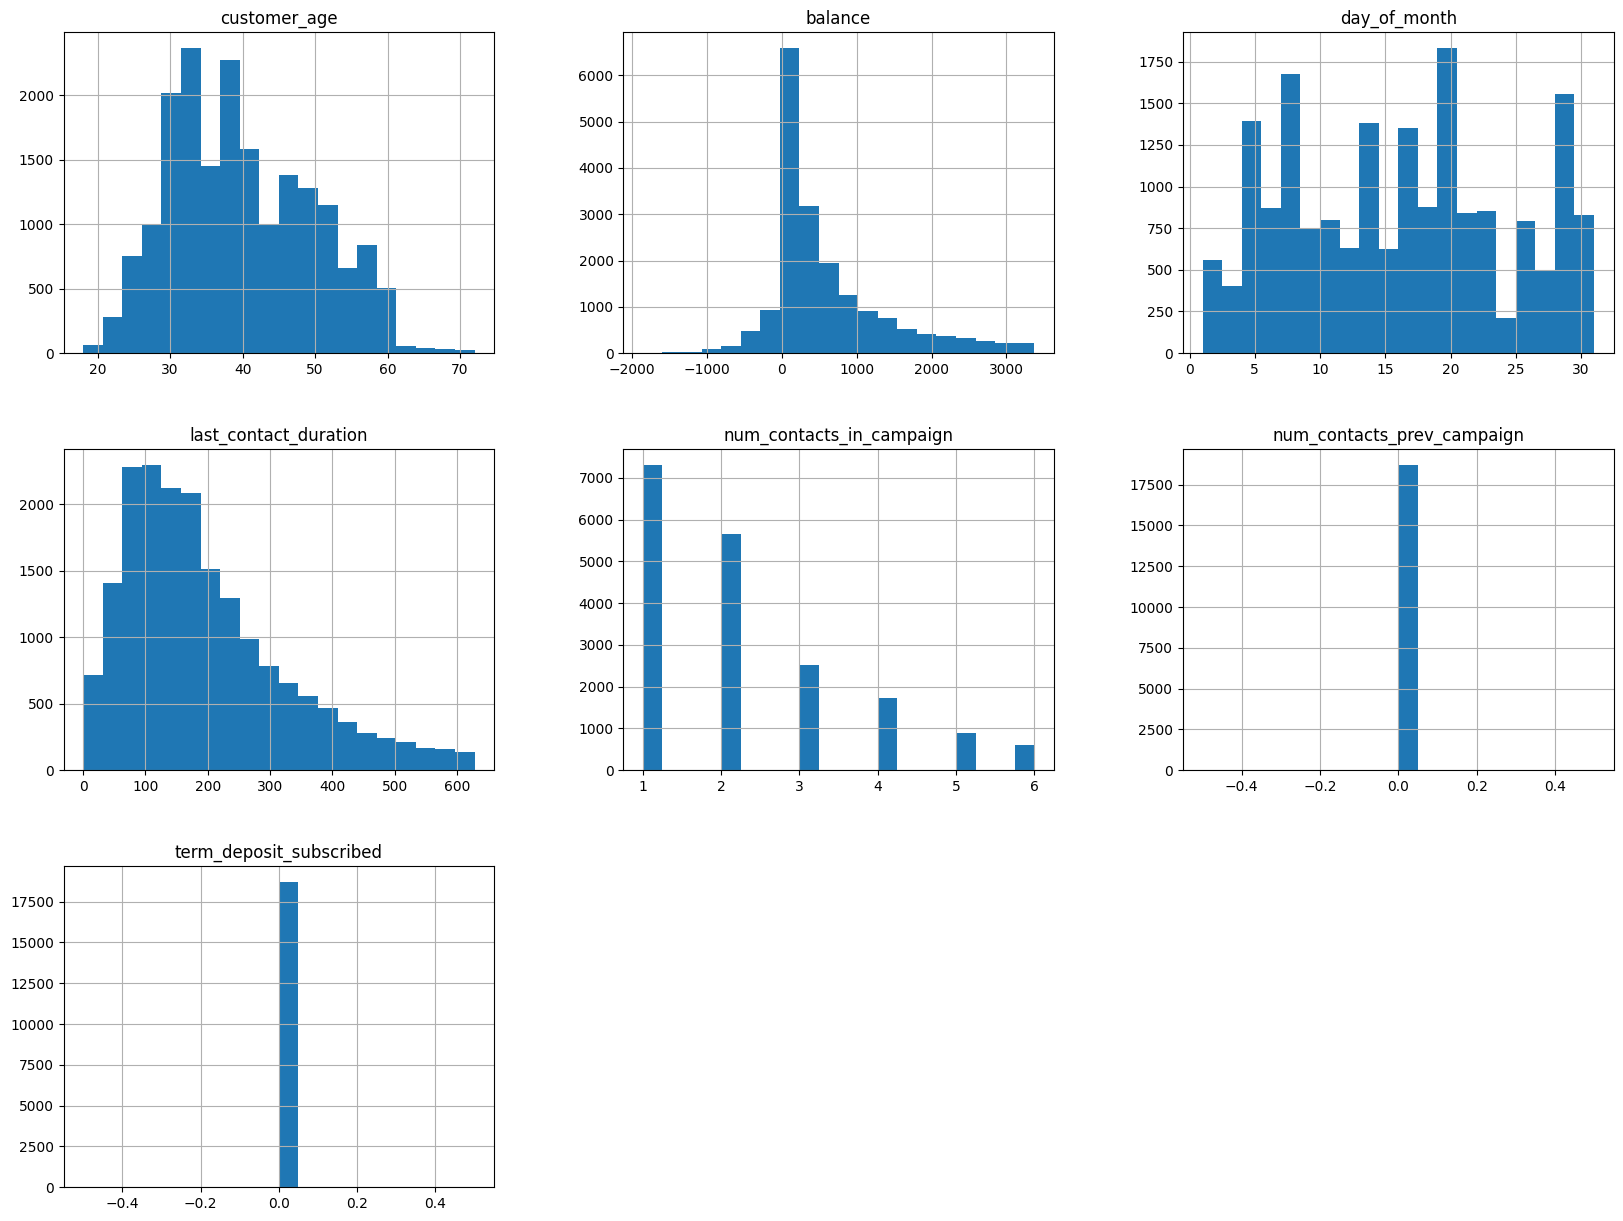

In [17]:
# Descriptive statistics
print("\nBasic Statistics for Train Dataset:")
print(train_df_no_outliers.describe())

# Distribution of numerical variables
train_df_no_outliers.hist(bins=20, figsize=(20,15))
plt.show()

## Univariate Analysis

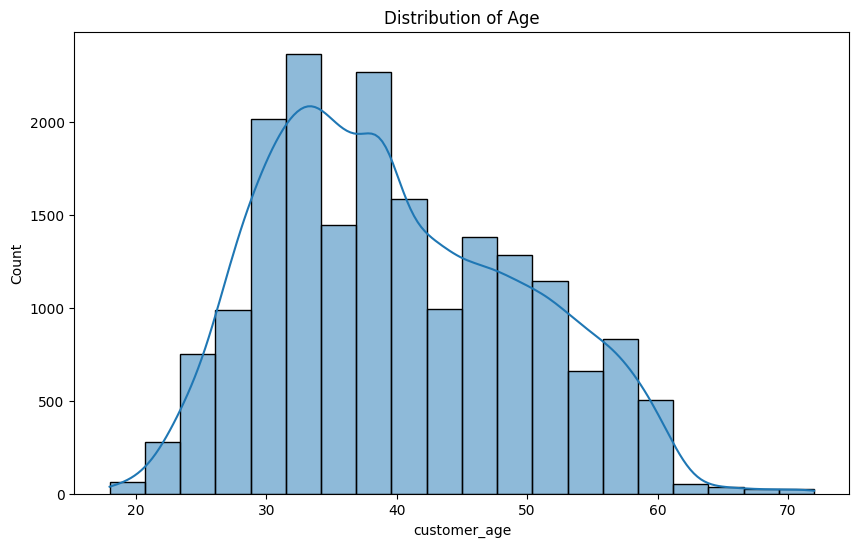

In [18]:
# Distribution of a selected variable
plt.figure(figsize=(10, 6))
sns.histplot(train_df_no_outliers['customer_age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

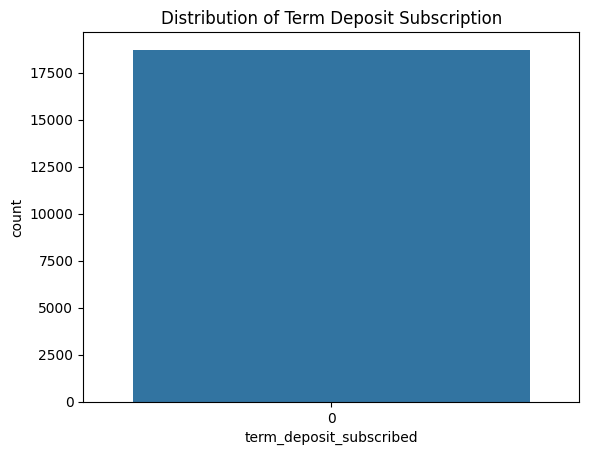

In [19]:
# Analyzing the target variable
sns.countplot(x='term_deposit_subscribed', data=train_df_no_outliers)
plt.title('Distribution of Term Deposit Subscription')
plt.show()

# Bivariate Analysis

In [20]:
# Correlation heatmap
numeric_columns = train_df_no_outliers.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train_df_no_outliers[numeric_columns].corr()


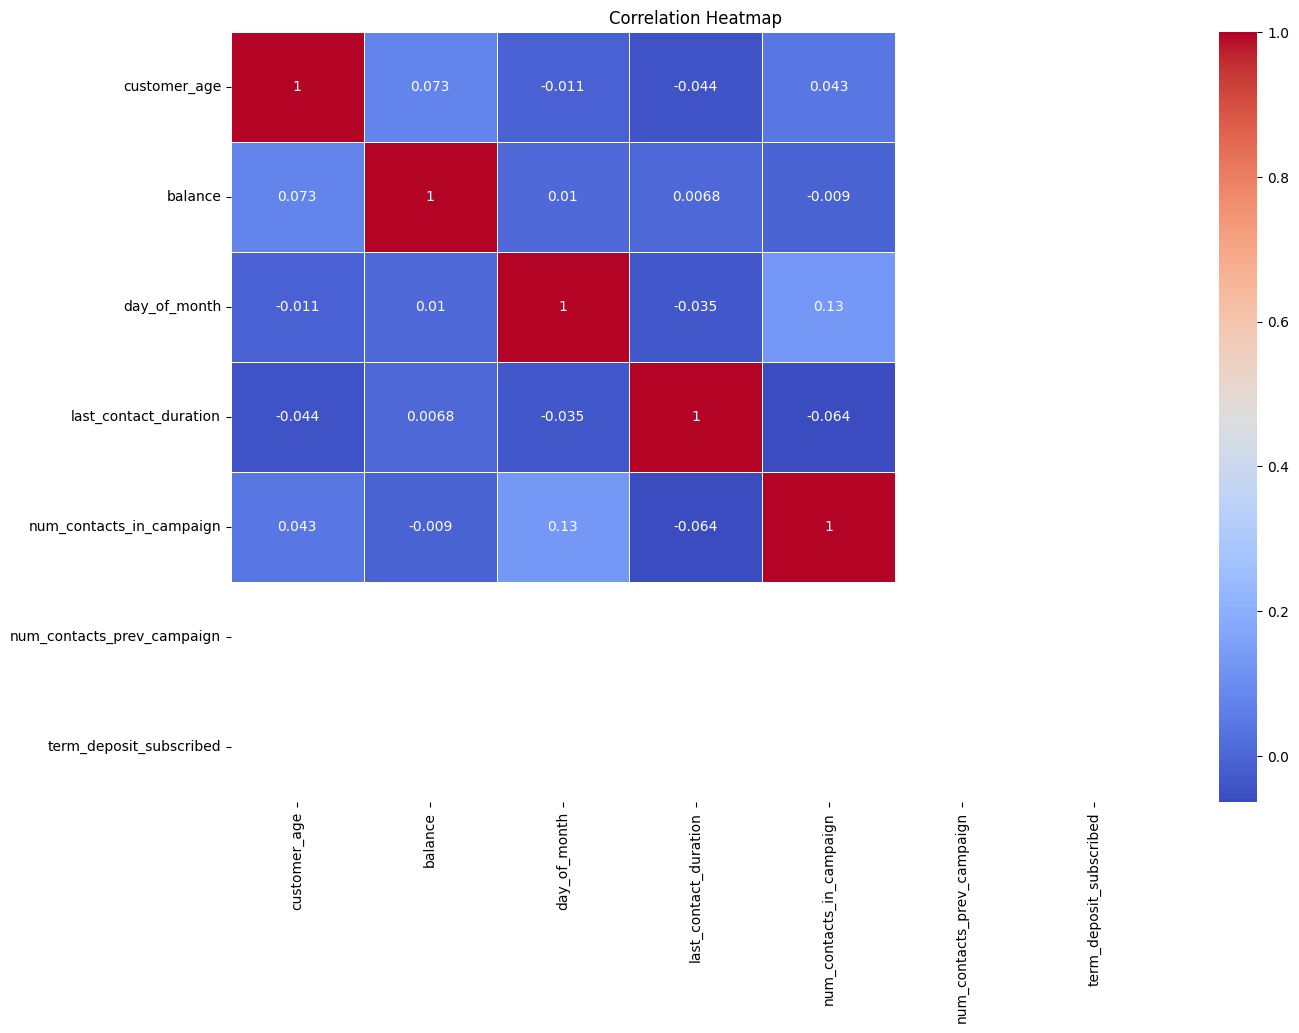

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## **Data Transformation**

# Encode Categorical Variables

In [22]:
# Encode categorical variables
categorical_columns = train_df_no_outliers.select_dtypes(include=['object']).columns
train_df_transformed = pd.get_dummies(train_df_no_outliers, columns=categorical_columns, drop_first=True)
test_df_transformed = pd.get_dummies(test_data, columns=categorical_columns, drop_first=True)

In [23]:
# Align test set columns with train set
test_df_transformed = test_df_transformed.reindex(columns=train_df_transformed.columns, fill_value=0)

In [24]:
print("Train Dataset after Encoding:")
train_df_transformed.head()


Train Dataset after Encoding:


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,id_id_1000,id_id_10000,id_id_10002,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,28.0,285.0,26,303.0,4.0,0,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,46.0,656.0,5,101.0,4.0,0,0,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,34.0,2.0,20,127.0,3.0,0,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,41.0,1352.0,13,49.0,2.0,0,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7,37.0,650.0,26,210.0,1.0,0,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [25]:
print("Test Dataset after Encoding:")
test_df_transformed.head()

Test Dataset after Encoding:


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,id_id_1000,id_id_10000,id_id_10002,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,55.0,7136.0,13,90.0,2.0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,24.0,179.0,18,63.0,2.0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
2,46.0,143.0,8,208.0,1.0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
3,56.0,6023.0,6,34.0,1.0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
4,62.0,2913.0,12,127.0,1.0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
train_df_scaled = pd.DataFrame(scaler.fit_transform(train_df_transformed), columns=train_df_transformed.columns)
test_df_scaled = pd.DataFrame(scaler.transform(test_df_transformed), columns=test_df_transformed.columns)

print("\nTrain Dataset after Scaling:")
train_df_scaled.head()




Train Dataset after Scaling:


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,id_id_1000,id_id_10000,id_id_10002,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,-1.217375,-0.369940,1.222394,0.827772,1.338078,0.0,0.0,-0.007309,-0.007309,-0.007309,...,-0.042024,-0.217024,-0.16803,-0.473735,2.587237,-0.063848,-0.716591,-0.27454,-0.077235,-0.070661
1,0.619095,0.090383,-1.304607,-0.721397,1.338078,0.0,0.0,-0.007309,-0.007309,-0.007309,...,-0.042024,4.607775,-0.16803,-0.473735,-0.386513,-0.063848,-0.716591,-0.27454,-0.077235,-0.070661
2,-0.605218,-0.721077,0.500394,-0.521999,0.593813,0.0,0.0,-0.007309,-0.007309,-0.007309,...,-0.042024,-0.217024,-0.16803,-0.473735,-0.386513,-0.063848,1.395496,-0.27454,-0.077235,-0.070661
3,0.108964,0.953955,-0.341940,-1.120192,-0.150451,0.0,0.0,-0.007309,-0.007309,-0.007309,...,-0.042024,-0.217024,-0.16803,-0.473735,-0.386513,-0.063848,1.395496,-0.27454,-0.077235,-0.070661
4,-0.299140,0.082938,1.222394,0.114541,-0.894716,0.0,0.0,-0.007309,-0.007309,-0.007309,...,-0.042024,-0.217024,-0.16803,-0.473735,-0.386513,-0.063848,1.395496,-0.27454,-0.077235,-0.070661


In [27]:
print("\nTest Dataset after Scaling:")
test_df_scaled.head()


Test Dataset after Scaling:


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,id_id_1000,id_id_10000,id_id_10002,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.537330,8.130533,-0.341940,-0.805757,-0.150451,0.0,0.0,-0.007309,-0.007309,-0.007309,...,-0.042024,-0.217024,-0.16803,-0.473735,-0.386513,-0.063848,-0.716591,-0.27454,-0.077235,-0.070661
1,-1.625480,-0.501461,0.259727,-1.012824,-0.150451,0.0,0.0,-0.007309,-0.007309,-0.007309,...,-0.042024,-0.217024,-0.16803,-0.473735,-0.386513,-0.063848,1.395496,-0.27454,-0.077235,-0.070661
2,0.619095,-0.546129,-0.943607,0.099202,-0.894716,0.0,0.0,-0.007309,-0.007309,-0.007309,...,-0.042024,-0.217024,-0.16803,2.110887,-0.386513,-0.063848,-0.716591,-0.27454,-0.077235,-0.070661
3,1.639356,6.749562,-1.184274,-1.235230,-0.894716,0.0,0.0,-0.007309,-0.007309,-0.007309,...,-0.042024,-0.217024,-0.16803,-0.473735,2.587237,-0.063848,-0.716591,-0.27454,-0.077235,-0.070661
4,2.251513,2.890787,-0.462273,-0.521999,-0.894716,1.0,0.0,-0.007309,-0.007309,-0.007309,...,-0.042024,-0.217024,-0.16803,-0.473735,-0.386513,-0.063848,-0.716591,-0.27454,-0.077235,-0.070661
